# Give Me Some Credit

## 1) Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import average_precision_score
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

warnings.simplefilter('ignore')

## 2) Data collection

## 3) Data preprocessing

### 3.1) Removing outliers

In [8]:
success = 0
fail = 0
for i,v in train.items():
    if i == "SeriousDlqin2yrs":
        for j in v:
            if j == 0:
                success += 1
            else:
                fail += 1
print("Number of Y:", success, "Number of N:", fail)

NameError: name 'train' is not defined

In [9]:
train = pd.read_csv("../input/GiveMeSomeCredit/cs-training.csv").drop(columns = 'Unnamed: 0')
train.SeriousDlqin2yrs = train.SeriousDlqin2yrs.astype('float64')

print("The total amount of training data:", train.shape)
print("Number of Y:", success, "Number of N:", fail)

The total amount of training data: (150000, 11)
Number of Y: 0 Number of N: 0


In [10]:
def remove_outliers(df):
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] <= 10]
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTimes90DaysLate'] < 96]
    df = df.loc[(df['DebtRatio'] <= df['DebtRatio'].quantile(0.95))]
    df = df.loc[(df['age'] >= 20)]
    return df

train1 = remove_outliers(train)
train1.shape

(142243, 11)

### 3.2) Filling null values

In [11]:
train1.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22505
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3390
dtype: int64

<AxesSubplot:>

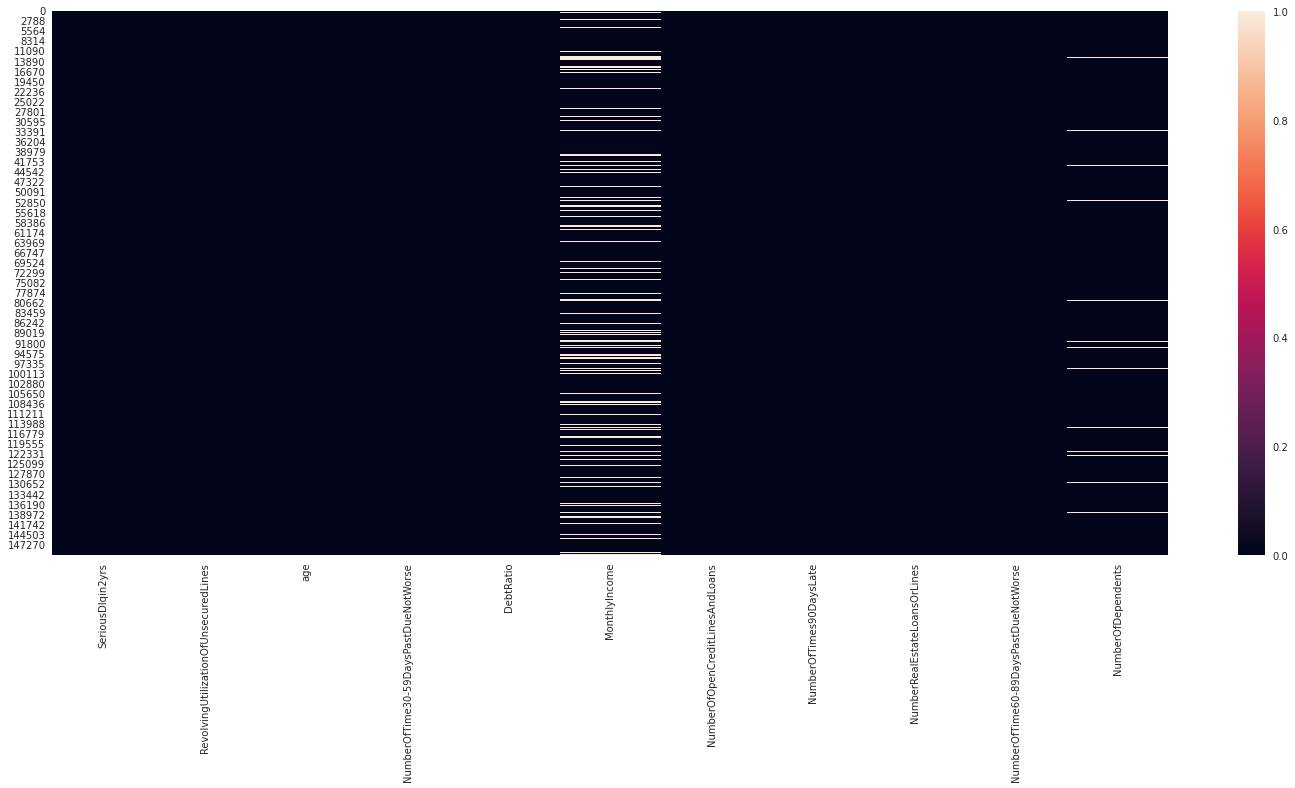

In [12]:
# Let's visualize the missing values.

plt.figure(figsize = (25, 10))

sns.heatmap(train1.isnull())

In [13]:
                                                                    def knn_imputation(df):
    imputer = KNNImputer(n_neighbors=3)
    df_imputed = imputer.fit_transform(df)
    df = pd.DataFrame(df_imputed, columns=df.columns)
    return df 

train1['NumberOfDependents'].fillna(0,inplace=True)
train2 = knn_imputation(train1)

In [14]:
train2.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 3.3) Balancing the dataset

In [15]:
X = train2.drop(columns='SeriousDlqin2yrs')
y = train2[['SeriousDlqin2yrs']]

over = SMOTE(sampling_strategy=0.1,k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

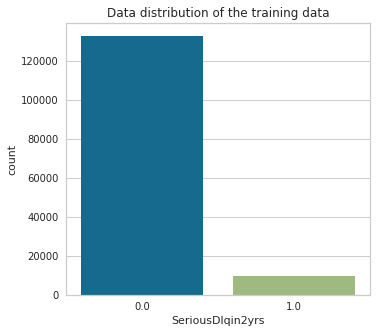

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="SeriousDlqin2yrs", data=train2)
plt.title('Data distribution of the training data')

plt.show()

In [17]:
train2.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


### 4) Modeling

# Below is a simple NN example:

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train2, test_size=0.2)
print(df_train.shape)
print(df_train.columns)

In [ ]:
sns.countplot(df_train['SeriousDlqin2yrs'], data = df_train)

In [ ]:
# Let's visualize the missing values.

plt.figure(figsize = (25, 10))

sns.heatmap(df_train.isnull())

In [ ]:
plt.figure(figsize = (6, 6))

# Age column is already normalized as you can see in the graph below.
sns.kdeplot(x = df_train['NumberOfTime60-89DaysPastDueNotWorse'], data = df_train)

In [40]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    layers.Dense(8, activation = 'relu', input_shape = (10,)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()


model.compile(
    
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
    
)

X_train = np.asarray(df_train).astype(np.int)

y_train = np.asarray(y).astype(np.int)


history = model.fit(
    
    X_train, y_train,
    epochs = 100,
    verbose = 0,
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


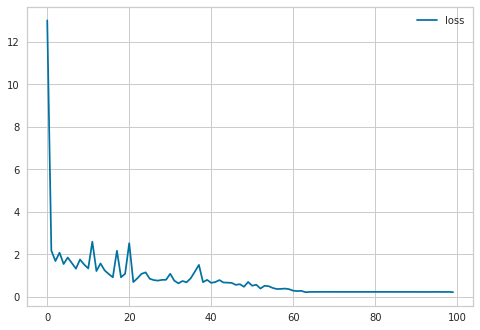

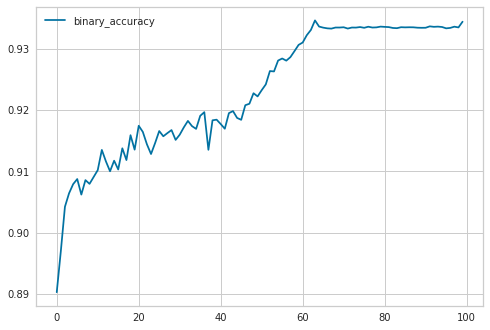

In [41]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()
history_frame.loc[:, ['binary_accuracy']].plot();

##################################################################


# Below are some ML methods,  1) Principal Component Analysis2)Logistic Regression 3)Gaussian Naive Bayes 4)Support Vector Machine 5)Random Forest Classifier 6)Decision trees 7)Simple neural network**

In [18]:
train2.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002295,-0.113514,0.273642,-0.021063,-0.014362,-0.025418,0.316088,-0.004049,0.266931,0.050113
RevolvingUtilizationOfUnsecuredLines,-0.002295,1.000000,-0.006177,-0.002770,0.003926,0.008412,-0.010522,-0.001598,0.006575,-0.003103,0.001731
age,-0.113514,-0.006177,1.000000,-0.074143,0.051151,0.010449,0.142213,-0.084343,0.027302,-0.071540,-0.218912
NumberOfTime30-59DaysPastDueNotWorse,0.273642,-0.002770,-0.074143,1.000000,-0.019866,0.007066,0.079003,0.218069,0.043884,0.304033,0.069710
DebtRatio,-0.021063,0.003926,0.051151,-0.019866,1.000000,-0.133187,-0.029651,-0.005928,0.016136,-0.004036,-0.106667
MonthlyIncome,-0.014362,0.008412,0.010449,0.007066,-0.133187,1.000000,0.111899,-0.018836,0.144077,-0.008721,0.093214
NumberOfOpenCreditLinesAndLoans,-0.025418,-0.010522,0.142213,0.079003,-0.029651,0.111899,1.000000,-0.094547,0.435039,-0.021620,0.079178
NumberOfTimes90DaysLate,0.316088,-0.001598,-0.084343,0.218069,-0.005928,-0.018836,-0.094547,1.000000,-0.061467,0.292001,0.031967
NumberRealEstateLoansOrLines,-0.004049,0.006575,0.027302,0.043884,0.016136,0.144077,0.435039,-0.061467,1.000000,-0.019266,0.148015
NumberOfTime60-89DaysPastDueNotWorse,0.266931,-0.003103,-0.071540,0.304033,-0.004036,-0.008721,-0.021620,0.292001,-0.019266,1.000000,0.038783


In [19]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(train2)
X

array([[ 3.74586319, -0.02040825, -0.48685562, ...,  4.55315893,
        -0.19716876,  1.12336039],
       [-0.26696116, -0.01964043, -0.82188642, ..., -0.88071251,
        -0.19716876,  0.22392973],
       [-0.26696116, -0.02084214, -0.95589874, ..., -0.88071251,
        -0.19716876, -0.67550092],
       ...,
       [-0.26696116, -0.02228285, -0.55386178, ...,  0.02493273,
        -0.19716876,  1.12336039],
       [-0.26696116, -0.02348767, -1.49194802, ..., -0.88071251,
        -0.19716876, -0.67550092],
       [-0.26696116, -0.02006999,  0.78626141, ...,  0.93057797,
        -0.19716876, -0.67550092]])

In [20]:
X = train2.drop(['SeriousDlqin2yrs'], axis='columns')
Y = train2['SeriousDlqin2yrs']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [51]:
# LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [52]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[26353,   174],
       [ 1685,   237]])

In [55]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5583748492249488

In [56]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7745988547117505

Text(0.5, 0, 'False Positive Rate')

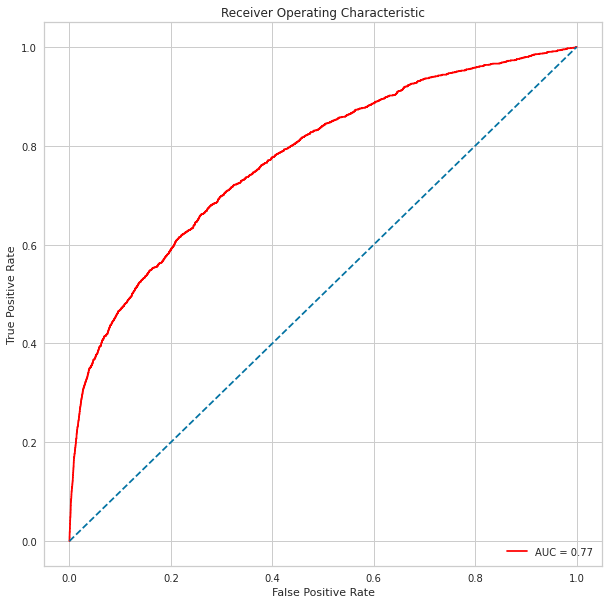

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [15]:
# tune the parameter
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=7)

clf = LGBMClassifier(objective='binary',
                     is_unbalance=True,
                     metric='average_precision')
clf.fit(X_train, y_train)

LGBMClassifier(is_unbalance=True, metric='average_precision',
               objective='binary')

In [59]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [60]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [61]:
print(LR.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [63]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [64]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5592683785907253

In [65]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7754573246734613

Text(0.5, 0, 'False Positive Rate')

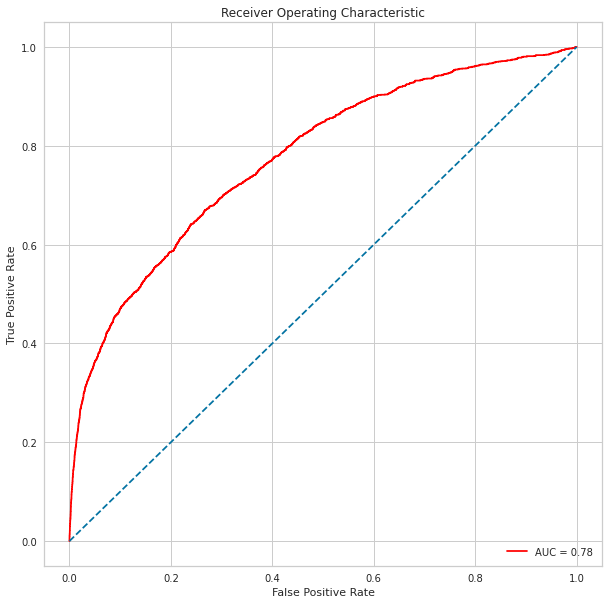

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB()

In [68]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

Text(0.5, 0, 'False Positive Rate')

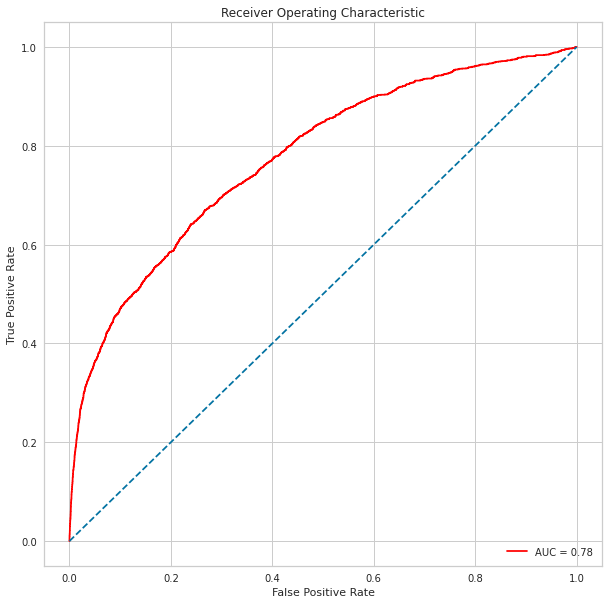

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}
               

In [17]:
model_RR.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [20]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

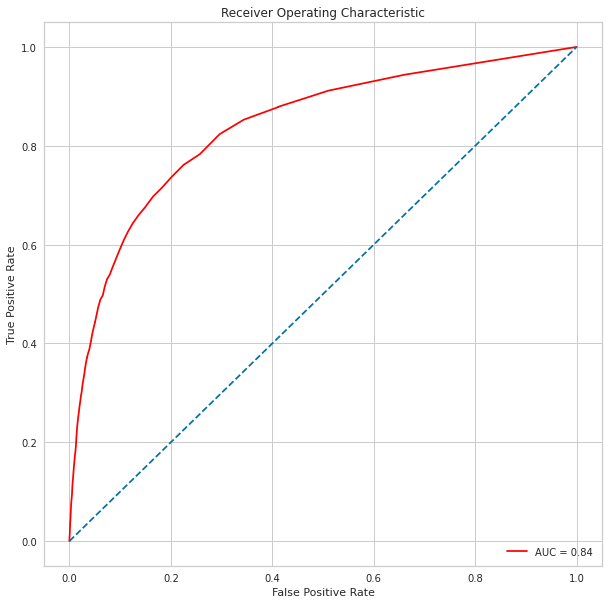

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
    

In [24]:
from sklearn.model_selection import RandomizedSearchCV

RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [25]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [26]:
print(RR_model.best_score_)
print(RR_model.best_params_)

0.9374308151898842
{'n_estimators': 80, 'min_samples_leaf': 30, 'max_features': 'auto'}


In [28]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

1.0

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5664393653539812

Text(0.5, 0, 'False Positive Rate')

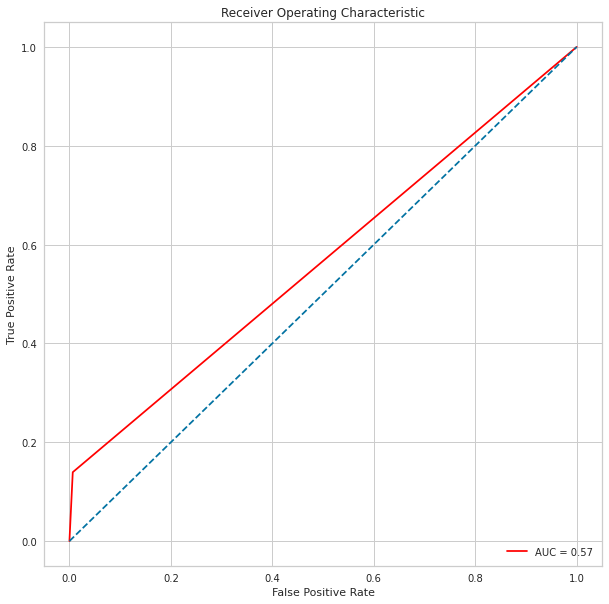

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [23]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

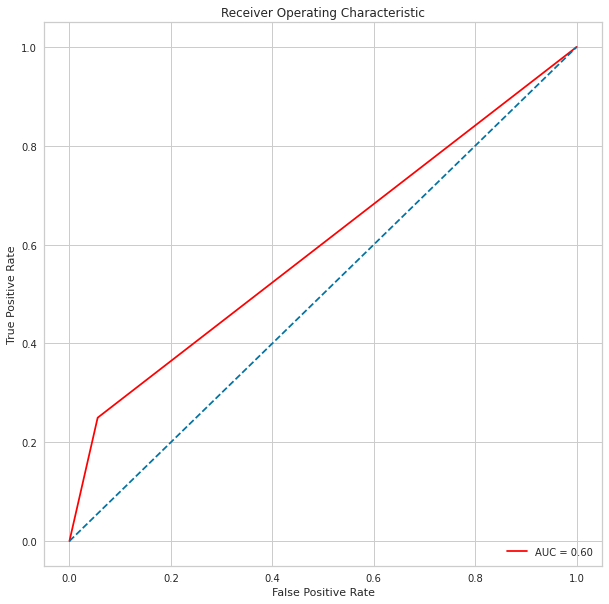

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [29]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [35]:
type(y_test)

pandas.core.series.Series

In [33]:
y_prob

array([5.27306112e-03, 4.88248689e-02, 1.57762086e-03, ...,
       4.17161892e-03, 4.25652850e-03, 5.66436781e-05])

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7841187725132859

Text(0.5, 0, 'False Positive Rate')

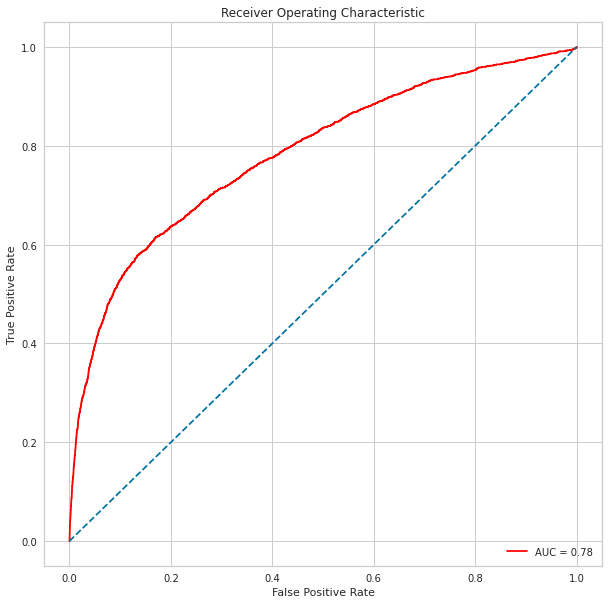

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [36]:
# DL
import torch
import numpy as np
X_train_tensor = torch.from_numpy(np.array(X_train)).float()
y_train_tensor = torch.from_numpy(np.array(y_train)).int()
X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).int()
print(X_train_tensor.shape, y_train_tensor.shape)
print(X_test_tensor.shape, y_test_tensor.shape)

torch.Size([113794, 10]) torch.Size([113794])
torch.Size([28449, 10]) torch.Size([28449])


In [37]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
  def __init__(self, X_df, Y_df):

    self.x = torch.from_numpy(np.array(X_df)).float()
    self.y = torch.from_numpy(np.array(Y_df)).int()
    assert self.x.shape[0] == self.y.shape[0]
  
  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    return sample

  def __len__(self):
    return len(self.x)

In [38]:
train_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)
bs = 28449
train_dl = DataLoader(train_data, bs, shuffle=True)
val_dl = DataLoader(test_data, bs, shuffle=False)

In [68]:
import torch.nn as nn
from torchmetrics import Accuracy
import torch
from torchvision.models import resnet18
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1' # 下面老是报错 shape 不一致
class LinearRegressionModel1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, input_dim * 4),
            nn.BatchNorm1d(input_dim * 4),
            nn.ReLU(),
            nn.Linear(input_dim * 4, input_dim),
            nn.BatchNorm1d(input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, output_dim),)
#         self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        out = self.model(x)
#         out = self.softmax(out)
        return out

    # 指定参数与损失函数
model = resnet18(num_classes=1).cuda()

epochs = 100
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
loss_func = torch.nn.CrossEntropyLoss()
acc = Accuracy().to(device)

for epoch in range(epochs):
        epoch += 1
        model.train()
        for xb1, yb in train_dl:
            xb1 = xb1.to(device)
            yb = yb.to(device)
            print(yb)
            preds = model(xb1)
            print(preds)
#             print(preds.shape, yb.float().squeeze(-1).shape)
            loss = preds-yb
#             loss = focal_loss()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        scheduler_1.step()
        # 每隔50次打印一次
        if epoch % 1 == 0:                
            model.eval()
            with torch.no_grad():
                predicted = model(X_test_tensor.to(device))
                y_tester = y_test_tensor.squeeze(-1).to(predicted.device)
                print('epoch {}, loss {}, acc {}'.format(epoch, loss.item(), acc(predicted, y_tester)))
#         print(average_precision_score(y_test_tensor.cpu().numpy(), predicted.detach().cpu().numpy()))
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [50]:
y_pred = model(X_test_tensor.to(device))
y_pred = y_pred[:,1]
y_pred = y_pred.detach().cpu().numpy()


array([0.00995045, 0.01554894, 0.01599848, ..., 0.0164046 , 0.0229433 ,
       0.00695116], dtype=float32)

In [51]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5471958321615811

Text(0.5, 0, 'False Positive Rate')

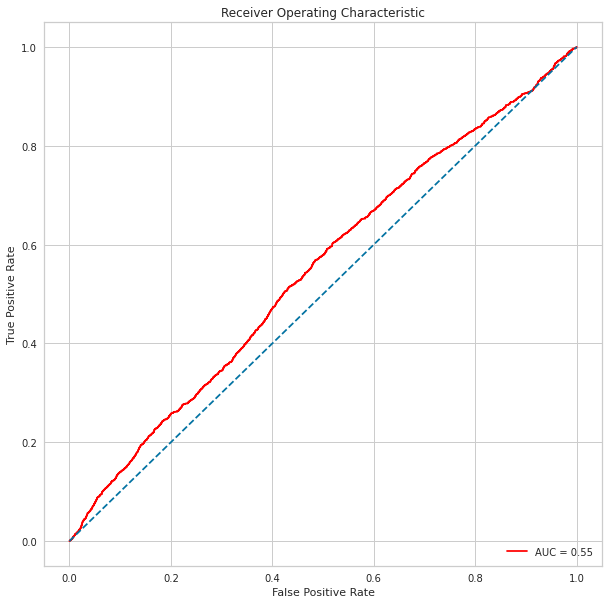

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [31]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Build a forest and compute the impurity-based feature importances
# forest = ExtraTreesClassifier(random_state=1)

# forest.fit(X_train, y_train)
forest = LGBMClassifier(objective='binary',
                     is_unbalance=True,
                     metric='average_precision')
forest.fit(X_train, y_train)
# feat_importances = pd.Series(forest.feature_importances_, index=x_train.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # lists to store feature indices and impurity value are created
# feature_indices = []
# feature_importance = []

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#     feature_indices.append(indices[f])
#     feature_importance.append(importances[indices[f]])
# feature_importance_array = np.array(list(zip(feature_indices,feature_importance)))

# Plot the impurity-based feature importances of the forest
# mean = feature_importance_array.mean(axis=0)[1]

# best_features = feature_importance_array[(feature_importance_array >= 0.00).all(axis=1)]


LGBMClassifier(is_unbalance=True, metric='average_precision',
               objective='binary')

In [33]:
y_prob = forest.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
forest.score(X_test, y_pred)

1.0

In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8635322258392849

Text(0.5, 0, 'False Positive Rate')

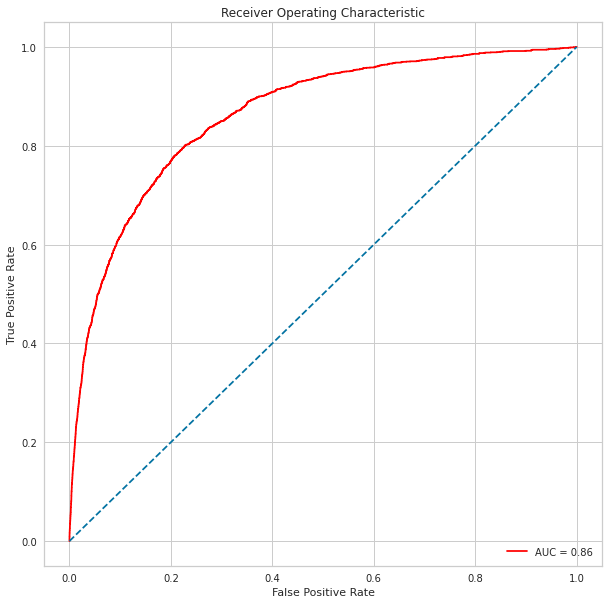

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [39]:
num_estimators = range(100, 501, 10)
test_scores = []
for num_estimator in num_estimators:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          num_leaves=60,
                          learning_rate=0.02,
                          n_estimators=num_estimator)
    lgbm.fit(X_train, y_train)
    y_prob = lgbm.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_scores.append(roc_auc)

num_estimators = num_estimators[test_scores.index(max(test_scores))]
num_estimators

190

Text(0.5, 0, 'False Positive Rate')

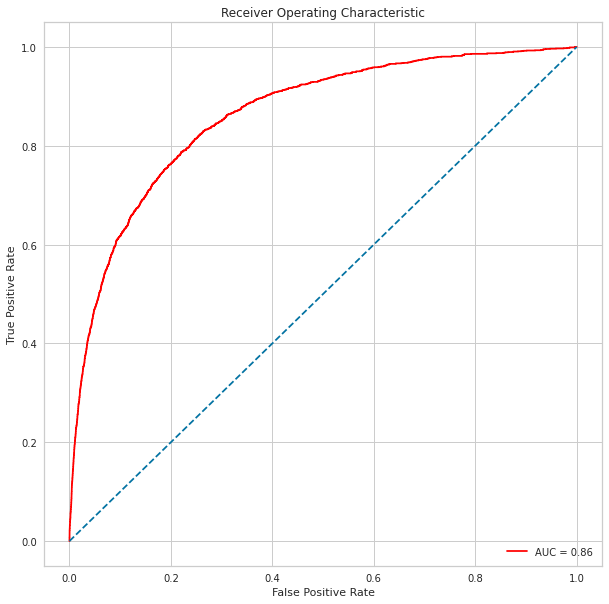

In [43]:

forest = LGBMClassifier(objective='binary',
                     is_unbalance=True,
                     n_estimators=num_estimators,
                     metric='average_precision')
forest.fit(X_train, y_train)
y_prob = lgbm.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

In [ ]:
###############################################################################
#                         Preprocess                                          #
###############################################################################
import shap
clf = LGBMClassifier(objective='binary',
                     is_unbalance=True,
                     metric='average_precision')
clf.fit(X_train, y_train)
i = 1
list_feature_names =[X_train.columns[i] for i in range(int(X_train.shape[1])) ]


In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
feature_importances = (clf.feature_importances_ / sum(clf.feature_importances_)) * 100
results = pd.DataFrame({'Importances': feature_importances, 'Features': list_feature_names,
                        })
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages')
plt.show()
#########################################

In [ ]:
df_feature_importance = (
    pd.DataFrame({
        'feature': list_feature_names,
        'importance': clf.feature_importances_,
    })
    .sort_values('importance', ascending=False)
)
df_feature_importance

In [ ]:
# best link : https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
#https://www.kaggle.com/dansbecker/shap-values

x_pre_df = pd.DataFrame(data=X_train,columns=list_feature_names)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_pre_df)
explainer.expected_value

In [ ]:
shap.summary_plot(shap_values [1],x_pre_df, max_display=10)

In [ ]:
# Get the index of elements with value 1
result = np.where(y == 0)
fraudvalue=result[0][0]
x_pre_df.iloc[fraudvalue,:][0:2]

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[1][fraudvalue,:], 
                x_pre_df.iloc[fraudvalue,:],link='logit'
)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [ ]:

print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")


plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [18]:
import torch
import numpy as np
X_train_tensor = torch.from_numpy(np.array(X_train)).float()
y_train_tensor = torch.from_numpy(np.array(y_train)).int()
X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).int()
print(X_train_tensor.shape, y_train_tensor.shape)
print(X_test_tensor.shape, y_test_tensor.shape)

torch.Size([31867, 10]) torch.Size([31867, 1])
torch.Size([7967, 10]) torch.Size([7967, 1])


In [19]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
  def __init__(self, X_df, Y_df):

    self.x = torch.from_numpy(np.array(X_df)).float()
    self.y = torch.from_numpy(np.array(Y_df)).int()
    assert self.x.shape[0] == self.y.shape[0]
  
  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    return sample

  def __len__(self):
    return len(self.x)

In [20]:
train_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)
bs = 1024
train_dl = DataLoader(train_data, bs, shuffle=True)
val_dl = DataLoader(test_data, bs, shuffle=False)

In [23]:
import torch.nn as nn
from torchmetrics import Accuracy
import torch

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, input_dim * 4),
            nn.BatchNorm1d(input_dim * 4),
            nn.ReLU(),
            nn.Linear(input_dim * 4, input_dim),
            nn.BatchNorm1d(input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, output_dim),)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        out = self.model(x)
        out = self.softmax(out)
        return out

    # 指定参数与损失函数
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LinearRegressionModel(10, 2).to(device)
# epochs = 1000
# learning_rate = 0.0001
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
# loss_func = nn.MSELoss().to(device)

    
epochs = 100
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
loss_func = torch.nn.CrossEntropyLoss()
# loss_func = FocalLoss()
acc = Accuracy().to(device)

for epoch in range(epochs):
        epoch += 1
        model.train()
        for xb1, yb in train_dl:
            xb1 = xb1.to(device)
            yb = yb.to(device)
            preds = model(xb1)
#             print(preds.shape, yb.float().squeeze(-1).shape)
            loss = loss_func(preds, yb.long().squeeze(-1))
#             loss = focal_loss()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        scheduler_1.step()
        # 每隔50次打印一次
        if epoch % 1 == 0:                
            model.eval()
            with torch.no_grad():
                predicted = model(X_test_tensor.to(device))
                y_tester = y_test_tensor.squeeze(-1).to(predicted.device)
                print('epoch {}, loss {}, acc {}'.format(epoch, loss.item(), acc(predicted, y_tester)))
#         print(average_precision_score(y_test_tensor.cpu().numpy(), predicted.detach().cpu().numpy()))
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

epoch 1, loss 0.624174952507019, acc 0.659846842288971
epoch 2, loss 0.6676400899887085, acc 0.659846842288971
epoch 3, loss 0.644111156463623, acc 0.659846842288971
epoch 4, loss 0.6384825706481934, acc 0.659846842288971
epoch 5, loss 0.620055079460144, acc 0.659846842288971
epoch 6, loss 0.638815701007843, acc 0.659846842288971
epoch 7, loss 0.6481461524963379, acc 0.659846842288971
epoch 8, loss 0.58693927526474, acc 0.659846842288971
epoch 9, loss 0.606444239616394, acc 0.659846842288971
epoch 10, loss 0.5997264385223389, acc 0.659846842288971
epoch 11, loss 0.6588186025619507, acc 0.659846842288971
epoch 12, loss 0.6172456741333008, acc 0.659846842288971
epoch 13, loss 0.5953852534294128, acc 0.659846842288971
epoch 14, loss 0.6612472534179688, acc 0.659846842288971
epoch 15, loss 0.6072680354118347, acc 0.659846842288971
epoch 16, loss 0.6653776168823242, acc 0.659846842288971
epoch 17, loss 0.6371050477027893, acc 0.659846842288971
epoch 18, loss 0.5914338231086731, acc 0.659846

In [5]:
def focal_loss(input_values, gamma):
    """Computes the focal loss"""
    p = torch.exp(-input_values)
    #loss = (1 - p) ** gamma * input_values
    loss = (1- p) ** gamma * input_values * 10
    return loss.mean()

class FocalLoss(nn.Module):
    def __init__(self, weight=None, gamma=2.):
        super(FocalLoss, self).__init__()
        assert gamma >= 0
        self.gamma = gamma
        self.weight = weight

    def forward(self, input, target):
        return focal_loss(F.cross_entropy(input, target, reduction='none', weight=self.weight), self.gamma)

NameError: name 'nn' is not defined

In [55]:
"""
resnet for 1-d signal data, pytorch version
Shenda Hong, Nov 2019
"""

import numpy as np
from collections import Counter
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

    
class Transformer1d(nn.Module):
    """
    
    Input:
        X: (n_samples, n_channel, n_length)
        Y: (n_samples)
        
    Output:
        out: (n_samples, n_classes)
        
    Pararmetes:
        
    """

    def __init__(self, n_classes, n_length, d_model, nhead, dim_feedforward, dropout, activation, verbose=False):
        super(Transformer1d, self).__init__()

        self.d_model = d_model
        self.nhead = nhead
        self.n_length = n_length
        self.dim_feedforward = dim_feedforward
        self.dropout = dropout
        self.activation = activation
        self.n_classes = n_classes
        self.verbose = verbose
        
        self.embed = nn.Linear(1, 20)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.d_model, 
            nhead=self.nhead, 
            dim_feedforward=self.dim_feedforward, 
            dropout=self.dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
        self.dense = nn.Linear(self.d_model, self.n_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.unsqueeze(-1)
        x = self.embed(x)
        x = x.transpose(-2,-1)
        out = x
        if self.verbose:
            print('input (n_samples, n_channel, n_length)', out.shape)
        out = out.permute(2, 0, 1)
        if self.verbose:
            print('transpose (n_length, n_samples, n_channel)', out.shape)

        out = self.transformer_encoder(out)
        if self.verbose:
            print('transformer_encoder', out.shape)

        out = out.mean(0)
        if self.verbose:
            print('global pooling', out.shape)

        out = self.dense(out)
        if self.verbose:
            print('dense', out.shape)

        out = self.softmax(out)
        if self.verbose:
            print('softmax', out.shape)
        
        return out    

In [58]:
    # 指定参数与损失函数

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
model = Transformer1d(2, X_train_tensor.shape[1], 20, 4, 80, 0.1, nn.GELU, False).to(device)
epochs = 1000
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
loss_func = torch.nn.CrossEntropyLoss()
# loss_func = FocalLoss()
acc = Accuracy().to(device)

for epoch in range(epochs):
        epoch += 1
        model.train()
        for xb1, yb in train_dl:
            xb1 = xb1.to(device)
            yb = yb.to(device)
            preds = model(xb1)
            print(preds.shape, yb.float().squeeze(-1).shape)
            loss = loss_func(preds, yb.long().squeeze(-1))
#             loss = focal_loss()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        scheduler_1.step()
        # 每隔50次打印一次
        if epoch % 1 == 0:                
            model.eval()
            with torch.no_grad():
                predicted = model(X_test_tensor.to(device))
                y_tester = y_test_tensor.squeeze(-1).to(predicted.device)
                print('epoch {}, loss {}, acc {}'.format(epoch, loss.item(), acc(predicted, y_tester)))
#         print(average_precision_score(y_test_tensor.cpu().numpy(), predicted.detach().cpu().numpy()))

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

AUC:  0.8565929733111562


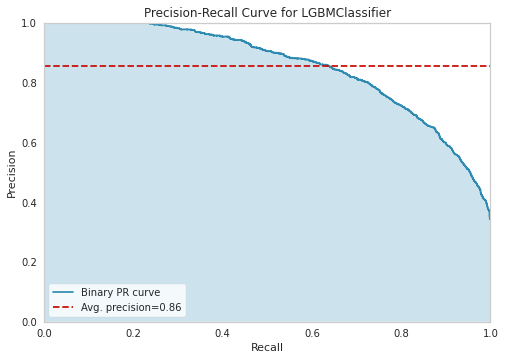

In [24]:
def Precision_Recall_Curve(clf, X_train, y_train, X_test, y_test):
    
    y_pred = clf.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    print('AUC: ', auc_score)
    visualizer = PrecisionRecallCurve(clf)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

Precision_Recall_Curve(clf, X_train, y_train, X_test, y_test)

### 4.1) Hyperparameter tuning

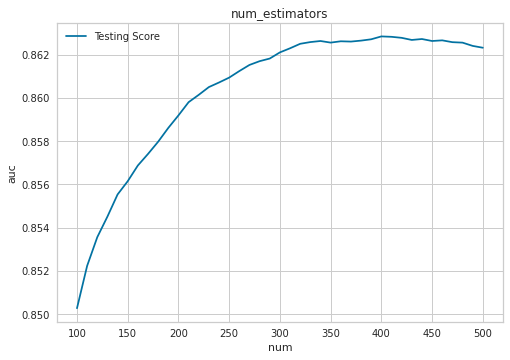

In [47]:
num_estimators = range(100, 501, 10)
test_scores = []
for num_estimator in num_estimators:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          num_leaves=60,
                          learning_rate=0.02,
                          n_estimators=num_estimator)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(num_estimators, test_scores, label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('num_estimators')
ax.legend(loc='best')
plt.show()

In [48]:
num_estimators = num_estimators[test_scores.index(max(test_scores))]
num_estimators

400

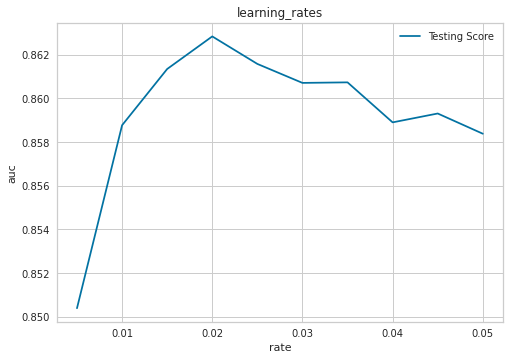

In [49]:
learning_rates = np.arange(1, 11, 1)
learning_rates = learning_rates / 200.0
test_scores = []
for learning_rate in learning_rates:
    lgbm = LGBMClassifier(objective='binary',
                          is_unbalance=True,
                          metric='average_precision',
                          num_leaves=60,
                          learning_rate=learning_rate,
                          n_estimators=num_estimators)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(learning_rates, test_scores, label='Testing Score')
ax.set_xlabel(r'rate')
ax.set_ylabel(r'auc')
ax.set_title('learning_rates')
ax.legend(loc='best')
plt.show()

In [50]:
learning_rate = learning_rates[test_scores.index(max(test_scores))]
learning_rate

0.02

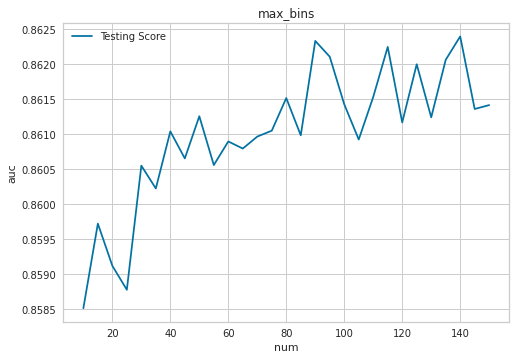

In [51]:
max_bins = range(10, 151, 5)
test_scores = []
for max_bin in max_bins:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          max_bin=max_bin,
                          num_leaves=60,
                          learning_rate=learning_rate,
                          n_estimators=num_estimators)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(max_bins, test_scores, label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('max_bins')
ax.legend(loc='best')
plt.show()

In [ ]:
max_bin = max_bins[test_scores.index(max(test_scores))]
max_bin

In [ ]:
num_leaves = range(5, 101, 5)
test_scores = []
for num_leave in num_leaves:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          num_leaves=num_leave,
                          max_bin=max_bin,
                          learning_rate=learning_rate,
                          n_estimators=num_estimators)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(num_leaves, test_scores, label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('num_leaves')
ax.legend(loc='best')
plt.show()

In [ ]:
num_leaves = num_leaves[test_scores.index(max(test_scores))]
num_leaves

In [ ]:
max_depths = range(2, 31, 1)
test_scores = []
for max_depth in max_depths:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          max_depth=max_depth,
                          num_leaves=num_leaves,
                          max_bin=max_bin,
                          learning_rate=learning_rate,
                          n_estimators=num_estimators)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(max_depths, test_scores, label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('max_depths')
ax.legend(loc='best')
plt.show()

In [ ]:
max_depth = max_depths[test_scores.index(max(test_scores))]
max_depth

In [ ]:
feature_fractions = np.arange(1, 11, 1)
feature_fractions = feature_fractions / 10.0
test_scores = []
for feature_fraction in feature_fractions:
    lgbm = LGBMClassifier(objective = 'binary',
                          is_unbalance = True,
                          metric='average_precision',
                          max_depth=max_depth,
                          num_leaves=num_leaves,
                          max_bin=max_bin,
                          learning_rate=learning_rate,
                          n_estimators=num_estimators,
                          feature_fraction=feature_fraction)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)
    auc_score = average_precision_score(y_test, y_pred[:, 1])
    test_scores.append(auc_score)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(feature_fractions, test_scores, label='Testing Score')
ax.set_xlabel(r'rate')
ax.set_ylabel(r'auc')
ax.set_title('feature_fractions')
ax.legend(loc='best')
plt.show()

In [ ]:
feature_fraction = feature_fractions[test_scores.index(max(test_scores))]
feature_fraction

In [ ]:
clf_tuned = LGBMClassifier(objective='binary',
                           is_unbalance=True,
                           metric='average_precision',
                           max_depth=max_depth,
                           num_leaves=num_leave,
                           max_bin=max_bin,
                           learning_rate=learning_rate,
                           n_estimators=num_estimator,
                           feature_fraction=feature_fraction)

clf_tuned.fit(X_train, y_train)
Precision_Recall_Curve(clf_tuned, X_train, y_train, X_test, y_test)

### 4.2) Calibration

In [ ]:
def Calibration_Curve(clf,X_test,y_test):
    probs = clf.predict_proba(X_test)[:,1]
    fop, mpv = calibration_curve(y_test, probs, n_bins=10)
    plt.plot([0, 1], [0, 1], linestyle='--',label = 'Ideally Calibrated')
    plt.plot(mpv, fop, marker='.',label = 'LGBM')
    leg = plt.legend(loc = 'upper left')
    plt.xlabel('Average Predicted Probability in each bin')
    plt.ylabel('Ratio of positives')
    plt.show()
    
Calibration_Curve(clf_tuned,X_test,y_test)

In [ ]:
clf_calibrated = CalibratedClassifierCV(clf_tuned, cv='prefit')
clf_calibrated.fit(X_train, y_train)
Calibration_Curve(clf_calibrated,X_test,y_test)

In [ ]:
Precision_Recall_Curve(clf_calibrated, X_train, y_train, X_test, y_test)

## 5) Evaluation

In [ ]:
test = pd.read_csv("../input/GiveMeSomeCredit/cs-test.csv").drop(columns = 'Unnamed: 0')
y_pred = clf_calibrated.predict_proba(test.drop(columns='SeriousDlqin2yrs'))
submission = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv') 
submission['Probability'] = y_pred
submission['Probability'] = 1-submission['Probability'] 
submission.to_csv('submission.csv',index=False)